In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
from pandas import ExcelWriter
from pandas import ExcelFile
from pprint import pprint
from scipy.stats import linregress
from datetime import timedelta
from mpl_toolkits.basemap import Basemap
from matplotlib.pyplot import figure

In [2]:
metriclist = ['BOV']#, 'BOVdiff', 'BOVma']
new_categories = {'fashion_clothing': ['perfumery', 'luggage_accessories','watches_gifts','fashion_underwear_beach','fashion_bags_accessories','fashion_shoes','fashion_male_clothing','fashion_sport','fashio_female_clothing','fashion_childrens_clothes'],
                  'home_furniture': ['housewares','art','arts_and_craftmanship','furniture_decor','office_furniture','bed_bath_table','home_confort','furniture_bedroom','kitchen_dining_laundry_garden_furniture','home_comfort_2','furniture_mattress_and_upholstery'],
                  'construction_tools': ['garden_tools','construction_tools_construction','construction_tools_lights','construction_tools_garden','construction_tools_safety','home_construction','construction_tools_tools'],
                  'electronics': ['computers_accessories','telephony','electionics','cds_dvds_musicals','consoles_games','audio','tablets_printing_image','computers','dvds_blu_ray','music'],
                  'food_drink': ['food','drinks','food_drink','la_cuisine'],
                  'books': ['books_general_interest','books_imported','books_technical'],
                  'appliances': ['air_conditioning','small_appliances','home_appliances','home_appliances_2','small_appliances_home_oven_and_coffee'],
                  'auto': ['auto'],
                  'industry':['agro_industry_and_commerce','industry_commerce_and_business'],
                  'other':['pet_shop','stationary','toys','baby','cool_stuff','sports_leisure','diapers_and_hygeine','signaling_and_security','party_supplies','cine_photo','market_place','musical_instruments','christmas_supplies']}

In [3]:
###CAN RUN OR JUST COMMENT OUT AND IMPORT FROM CSV TO DF IN NEXT CELL 



# fileordprod = "./data/brazilian-ecommerce/olist_order_items_dataset.csv"
# fileordcusttime = "./data/brazilian-ecommerce/olist_orders_dataset.csv"
# fileprodcat = "./data/brazilian-ecommerce/olist_products_dataset.csv"
# fileprodtransl = "./data/brazilian-ecommerce/product_category_name_translation.csv"
# filecustzip = "./data/brazilian-ecommerce/olist_customers_dataset.csv"
# filezipcoord = "./data/brazilian-ecommerce/olist_geolocation_dataset.csv"

# ordprod = pd.read_csv(fileordprod)#[['order_id', 'product_id', 'price']]
# ordcusttime= pd.read_csv(fileordcusttime)#[['order_id', 'customer_id', 'order_purchase_timestamp']]
# prodcat = pd.read_csv(fileprodcat)#[['product_id', 'product_category_name']]
# prodtransl = pd.read_csv(fileprodtransl)
# custzip = pd.read_csv(filecustzip)[['customer_id','customer_zip_code_prefix']]
# zipcoord = pd.read_csv(filezipcoord)[['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']]

# zipcoord = zipcoord.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'}).drop_duplicates(subset = 'customer_zip_code_prefix')

# mergedf = pd.merge(ordcusttime, ordprod, on = 'order_id',how= 'left')
# mergedf = pd.merge(mergedf, prodcat, on = 'product_id', how = 'left')
# mergedf = pd.merge(mergedf, prodtransl, on = 'product_category_name', how = 'left')
# mergedf = pd.merge(mergedf, custzip, on = 'customer_id', how = 'left')
# mergedf = pd.merge(mergedf, zipcoord, on = 'customer_zip_code_prefix' , how = 'left')

# renamecolumns = {
#     'order_purchase_timestamp': 'order_time',
#     'product_category_name_english': 'category'
# }
# mergedf = mergedf.rename(columns = renamecolumns)

# #minus one day
# mergedf["date_time"]= pd.to_datetime(mergedf['order_time']) - timedelta(days=1)

# #converted to MM/YY Format
# mergedf['YYYY'] = pd.DatetimeIndex(mergedf['date_time']).year
# mergedf['MM'] = pd.DatetimeIndex(mergedf['date_time']).month
# mergedf['month'] = pd.to_datetime(mergedf['date_time'])
# mergedf['day'] = mergedf['month'].dt.strftime('%m/%d/%y')
# mergedf['month'] = mergedf['month'].dt.strftime('%m/%y')

# #Rid of black friday
# mergedf = mergedf.loc[mergedf['day'] != '11/23/17']

# #Add lat lon bins
# lngbin = np.arange(min(mergedf['geolocation_lng']), max(mergedf['geolocation_lng']), 1)
# latbin = np.arange(min(mergedf['geolocation_lat']), max(mergedf['geolocation_lat']), 1)

# lngbinlabel = []
# latbinlabel = []

# for lng in range(0, len(lngbin) - 1):
#     lngbinlabel.append(lngbin[lng] + (lngbin[lng+1] - lngbin[lng])/2)
        
# for lat in range(0, len(latbin) - 1):
#     latbinlabel.append(latbin[lat] + (latbin[lat+1] - latbin[lat])/2)

# mergedf['lngbin'] = pd.cut(mergedf['geolocation_lng'], lngbin, labels=lngbinlabel)
# mergedf['latbin'] = pd.cut(mergedf['geolocation_lat'], latbin, labels=latbinlabel)

# urlBOV = "https://www.quandl.com/api/v3/datasets/BCB/7.json?api_key=2vRuu5GNchksqBdcAHzc"
# responseBOV = requests.get(urlBOV).json()


# BOV_df = pd.DataFrame(responseBOV['dataset']['data'])

# BOV_df = BOV_df.rename(index=str, columns={0: "day", 1: "BOV"})

# BOV_df['day'] = pd.to_datetime(BOV_df['day'])
# BOV_df['day'] = BOV_df['day'].dt.strftime('%m/%d/%y')
# BOV_df['BOV'] = pd.to_numeric(BOV_df['BOV'])
# BOV_df = BOV_df.sort_values(by = 'day', ascending = True)
# mergedf = pd.merge(mergedf, BOV_df, on = 'day', how = 'left')

# new_dict = {}
# for key,valuelist in new_categories.items():
#     for v in valuelist:
#         new_dict[v] = key

# mergedf['category'] = mergedf.category.replace(new_dict)
# mergedf.to_csv('./data/mergedf.csv')

# mergedf.head()

In [4]:
mergedf = pd.read_csv('./data/mergedf.csv')

In [5]:
home_furniture = mergedf['price'][mergedf['category']=='home_furniture'].sum()
fashion_clothing = mergedf['price'][mergedf['category']=='fashion_clothing'].sum()
construction_tools = mergedf['price'][mergedf['category']=='construction_tools'].sum()
electronics = mergedf['price'][mergedf['category']=='electronics'].sum()
food_drink = mergedf['price'][mergedf['category']=='food_drink'].sum()
books = mergedf['price'][mergedf['category']=='books'].sum()
appliances = mergedf['price'][mergedf['category']=='appliances'].sum()

auto = mergedf['price'][mergedf['category']=='auto'].sum()
industry = mergedf['price'][mergedf['category']=='industry'].sum()
other = mergedf['price'][mergedf['category']=='other'].sum()


total_spend = home_furniture + fashion_clothing + construction_tools + electronics + food_drink + books + appliances + auto + industry + other

category_spend = {home_furniture:'home_furniture',
                        fashion_clothing:'fashion_clothing',
                        construction_tools:'construction_tools',
                        electronics:'electronics',
                        food_drink:'food_drink',
                        books:'books',
                        appliances:'appliances',
                        auto:'auto',
                        appliances:'industry',
                        other:'other'
                       }

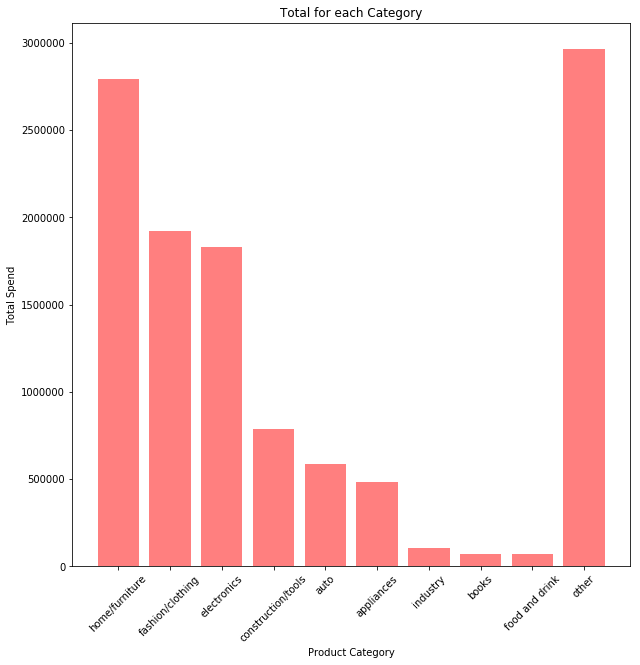

In [14]:
x_axis = ['home/furniture', 'fashion/clothing', 'electronics', 'construction/tools', 'auto', 'appliances', 'industry', 'books', 'food and drink', 'other']
sizes =[home_furniture, fashion_clothing, electronics, construction_tools, auto, appliances, industry, books, food_drink, other]
fig = plt.figure(figsize=(10, 10))
plt.bar(x_axis, sizes, color='r', alpha=0.5, align="center", orientation = 'vertical')
plt.xticks(rotation = 45)
# Save Figure

plt.title("Total for each Category")
plt.xlabel("Product Category")
plt.ylabel("Total Spend")
plt.savefig("./Graphs/total_spend.png")
plt.show()

In [7]:
groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()

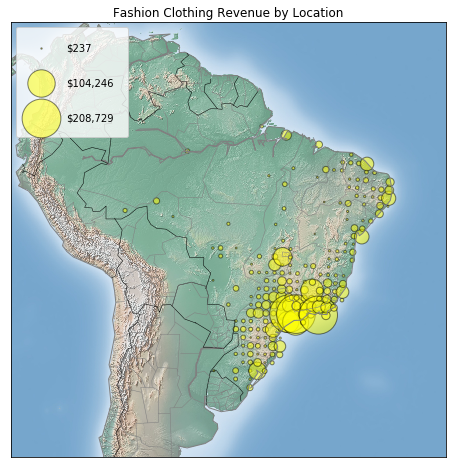

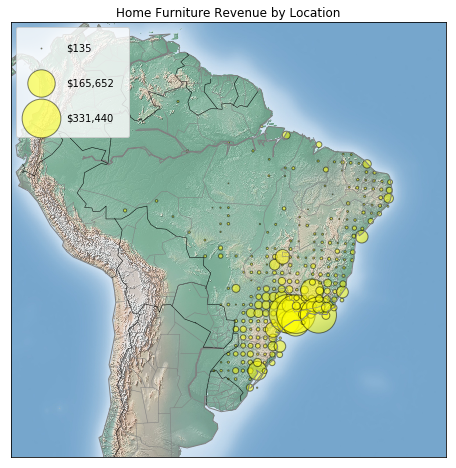

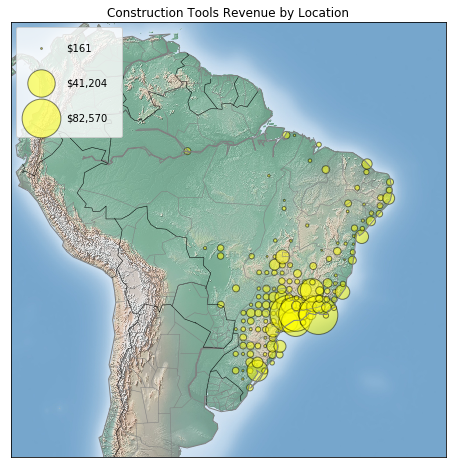

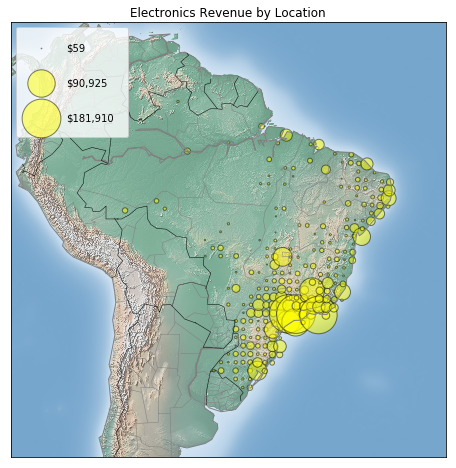

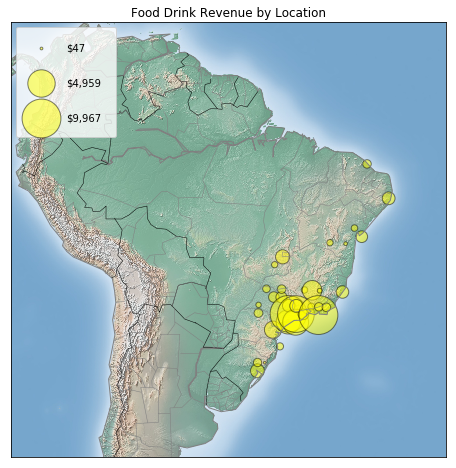

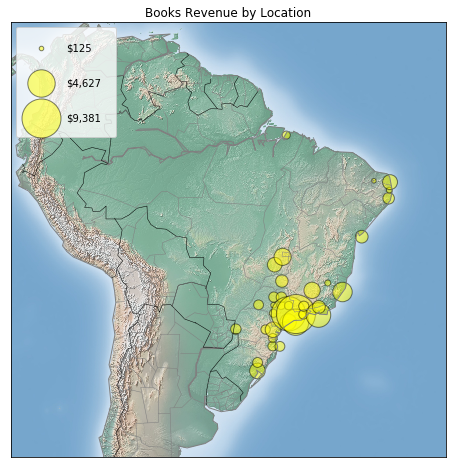

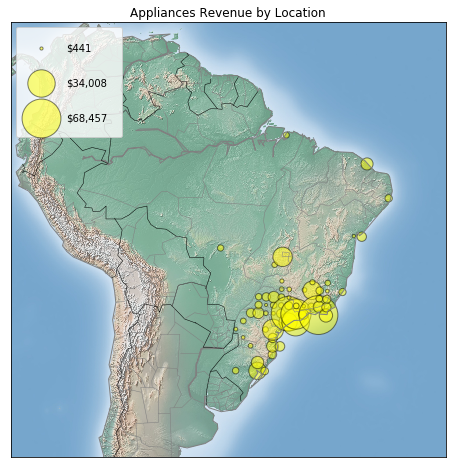

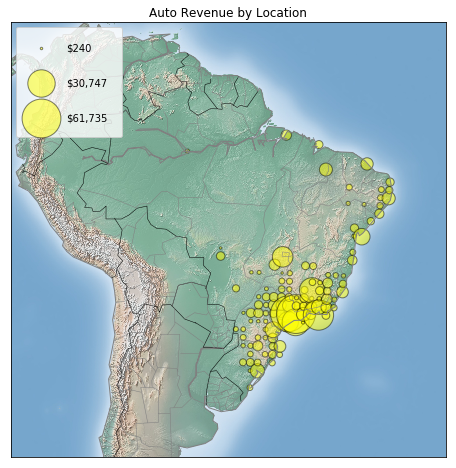

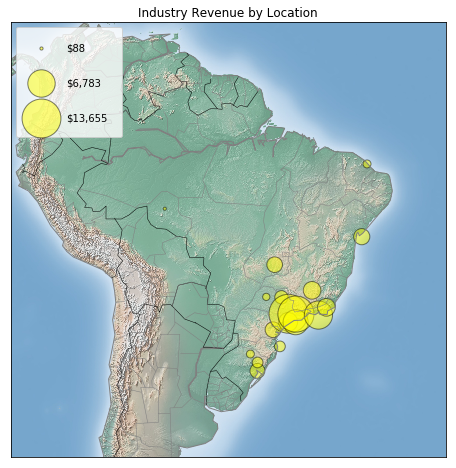

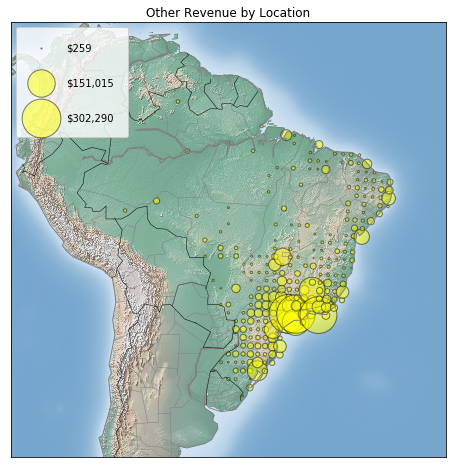

In [8]:
minlng = min(groupdf['lngbin'])
maxlng = max(groupdf['lngbin'])
minlat = min(groupdf['latbin'])
maxlat = max(groupdf['latbin'])
marginlng = (max(groupdf['lngbin'])-min(groupdf['lngbin']))/10
marginlat = (max(groupdf['latbin'])-min(groupdf['latbin']))/10
dividebytotal = (max(groupdf['price']) - min(groupdf['price']))/1500

for cat in new_categories.keys():
    
    ###COMPARED TO SELF###
    groupdf = mergedf.groupby(['lngbin', 'latbin', 'category'])
    groupdf = groupdf.sum()
    groupdf = groupdf.loc[groupdf['price'].isnull() == False]
    groupdf = groupdf.loc[groupdf['order_item_id'] > 5]
    groupdf = groupdf.reset_index()
    
    groupdf = groupdf.loc[groupdf['category'] == cat]
    
    dividebyeach = (max(groupdf['price']) - min(groupdf['price']))/1500
    
    #Create Map
    lon = list(groupdf['lngbin'])
    lat = list(groupdf['latbin'])
    revenue = list(groupdf['price']/dividebyeach)

    fig = plt.figure(figsize=(8, 8))
    m = Basemap(projection='lcc', resolution='c', 
                lat_0=-14.1, lon_0=-55.2,
                width=6000000, height=6000000)
    m.shadedrelief()
    m.drawcoastlines(color='gray')
    m.drawcountries(color='black')
    m.drawstates(color='gray')
    m.scatter(lon, lat, latlon=True, s=revenue, alpha=0.5, edgecolor = 'black', color = 'yellow')
    
    #LEGEND
    marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebyeach)
    marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebyeach)
    marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebyeach)
    legend_markers = [marker1, marker2, marker3]
    labels = [
        '$' + str("{:,}".format(int(groupdf['price'].min()))),
        '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
        '$' + str("{:,}".format(int(groupdf['price'].max())))
        ]
    leg = plt.legend(handles=legend_markers, labels=labels, loc='upper left',
        scatterpoints=1, labelspacing = 2.5, borderpad = 1.5, handletextpad = 1.5)
    LH = leg.legendHandles
    LH[0].set_color('yellow')
    LH[1].set_color('yellow')
    LH[0].set_alpha(0.5)
    LH[1].set_alpha(0.5)
    LH[0].set_edgecolor('black')
    LH[1].set_edgecolor('black')
    LH[2].set_color('yellow')
    LH[2].set_alpha(0.5)
    LH[2].set_edgecolor('black')
    plt.title(f'{cat.replace("_", " ").title()} Revenue by Location')
    plt.savefig(f'./Graphs/{cat.replace("_", " ").title()} Revenue by Location.png')
    plt.show()
    
    ###COMPARED TO TOTAL###
    
#     lon = list(groupdf['lngbin'])
#     lat = list(groupdf['latbin'])
#     revenue = list(groupdf['price']/dividebytotal)

#     #Create map
#     fig = plt.figure(figsize=(8, 8))
#     m = Basemap(projection='lcc', resolution='c', 
#                 lat_0=-14.1, lon_0=-55.2,
#                 width=6000000, height=6000000)
#     m.shadedrelief()
#     m.drawcoastlines(color='gray')
#     m.drawcountries(color='black')
#     m.drawstates(color='gray')
#     m.scatter(lon, lat, latlon=True, s=revenue, alpha=0.5, edgecolor = 'black', color = 'orange')
    
#     #LEGEND
#     marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebytotal)
#     marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebytotal)
#     marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebytotal)
#     legend_markers = [marker1, marker2, marker3]
#     labels = [
#         '$' + str("{:,}".format(int(groupdf['price'].min()))),
#         '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
#         '$' + str("{:,}".format(int(groupdf['price'].max())))
#         ]
#     leg = plt.legend(handles=legend_markers, labels=labels, loc='upper left',
#         scatterpoints=1, labelspacing = 1, borderpad = 1)
#     LH = leg.legendHandles
#     LH[0].set_color('orange')
#     LH[1].set_color('orange')
#     LH[0].set_alpha(0.5)
#     LH[1].set_alpha(0.5)
#     LH[0].set_edgecolor('black')
#     LH[1].set_edgecolor('black')
#     LH[2].set_color('orange')
#     LH[2].set_alpha(0.5)
#     LH[2].set_edgecolor('black')
#     plt.title(f'{cat.replace("_", " ").title()} Revenue by Location, Sized in Comparison to Total')
#     plt.savefig(f'./Graphs/{cat.replace("_", " ").title()} Revenue by Location, Sized in Comparison to Total.png')
    
    plt.show()

In [ ]:
###TOTAL###
mergedf = pd.read_csv('./data/mergedf.csv')
groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()

minlng = min(groupdf['lngbin'])
maxlng = max(groupdf['lngbin'])
minlat = min(groupdf['latbin'])
maxlat = max(groupdf['latbin'])
marginlng = (max(groupdf['lngbin'])-min(groupdf['lngbin']))/10
marginlat = (max(groupdf['latbin'])-min(groupdf['latbin']))/10
dividebytotal = (max(groupdf['price']) - min(groupdf['price']))/1500


groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()

lon = list(groupdf['lngbin'])
lat = list(groupdf['latbin'])
revenue = list(groupdf['price']/dividebytotal)

#Create Map
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='c', 
            lat_0=-14.1, lon_0=-55.2,
            width=6000000, height=6000000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True, s=revenue, alpha=0.5, edgecolor = 'black', color = 'orange')


# 3. create colorbar and legend
marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebytotal)
marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebytotal)
marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebytotal)
legend_markers = [marker1, marker2, marker3]
labels = [
    '$' + str("{:,}".format(int(groupdf['price'].min()))),
    '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
    '$' + str("{:,}".format(int(groupdf['price'].max())))
    ]
leg = plt.legend(handles=legend_markers, labels=labels, loc='upper left',
    scatterpoints=1, labelspacing = 4, borderpad = 3, handletextpad = 1.25)
LH = leg.legendHandles
LH[0].set_color('orange')
LH[1].set_color('orange')
LH[0].set_alpha(0.5)
LH[1].set_alpha(0.5)
LH[0].set_edgecolor('black')
LH[1].set_edgecolor('black')
LH[2].set_color('orange')
LH[2].set_alpha(0.5)
LH[2].set_edgecolor('black')
# plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
# plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)

plt.title('Total Revenue by Location')
plt.savefig('./Graphs/Total Revenue by Location.png')

# make legend with dummy points
# for a in [100, 300, 500]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' km$^2$')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');

In [ ]:
###SAME AS GRAPHS ABOVE BUT NOT USING BASEMAP

mergedf = pd.read_csv('./data/mergedf.csv')
groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()

minlng = min(groupdf['lngbin'])
maxlng = max(groupdf['lngbin'])
minlat = min(groupdf['latbin'])
maxlat = max(groupdf['latbin'])
marginlng = (max(groupdf['lngbin'])-min(groupdf['lngbin']))/10
marginlat = (max(groupdf['latbin'])-min(groupdf['latbin']))/10
dividebytotal = (max(groupdf['price']) - min(groupdf['price']))/1500

for cat in new_categories.keys():
    
    ###COMPARED TO SELF###
    groupdf = mergedf.groupby(['lngbin', 'latbin', 'category'])
    groupdf = groupdf.sum()
    groupdf = groupdf.loc[groupdf['price'].isnull() == False]
    groupdf = groupdf.loc[groupdf['order_item_id'] > 5]
    groupdf = groupdf.reset_index()
    
    groupdf = groupdf.loc[groupdf['category'] == cat]
    
    dividebyeach = (max(groupdf['price']) - min(groupdf['price']))/1500
    plt.scatter(groupdf['lngbin'], groupdf['latbin'], color="coral", edgecolor="black", alpha = 0.5,marker="o", s=groupdf['price']/dividebyeach)
    plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
    plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)
    
    #LEGEND
    marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebyeach)
    marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebyeach)
    marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebyeach)
    legend_markers = [marker1, marker2, marker3]
    labels = [
        '$' + str("{:,}".format(int(groupdf['price'].min()))),
        '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
        '$' + str("{:,}".format(int(groupdf['price'].max())))
        ]
    leg = plt.legend(handles=legend_markers, labels=labels, loc='upper right',
        scatterpoints=1, labelspacing = 2.5, borderpad = 1.5, handletextpad = 1.5)
    LH = leg.legendHandles
    LH[0].set_color('coral')
    LH[1].set_color('coral')
    LH[0].set_alpha(0.5)
    LH[1].set_alpha(0.5)
    LH[0].set_edgecolor('black')
    LH[1].set_edgecolor('black')
    LH[2].set_color('coral')
    LH[2].set_alpha(0.5)
    LH[2].set_edgecolor('black')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'{cat.replace("_", " ").title()} Revenue by Location')
    plt.savefig(f'./Graphs/{cat.replace("_", " ").title()} Revenue by Location.png')
    plt.show()
    
    ###COMPARED TO TOTAL###
    
    plt.scatter(groupdf['lngbin'], groupdf['latbin'], color="coral", edgecolor="black", alpha = 0.5,marker="o", s=groupdf['price']/dividebytotal)
    plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
    plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)
    
    #LEGEND
    marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebytotal)
    marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebytotal)
    marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebytotal)
    legend_markers = [marker1, marker2, marker3]
    labels = [
        '$' + str("{:,}".format(int(groupdf['price'].min()))),
        '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
        '$' + str("{:,}".format(int(groupdf['price'].max())))
        ]
    leg = plt.legend(handles=legend_markers, labels=labels, loc='upper right',
        scatterpoints=1, labelspacing = 1, borderpad = 1)
    LH = leg.legendHandles
    LH[0].set_color('coral')
    LH[1].set_color('coral')
    LH[0].set_alpha(0.5)
    LH[1].set_alpha(0.5)
    LH[0].set_edgecolor('black')
    LH[1].set_edgecolor('black')
    LH[2].set_color('coral')
    LH[2].set_alpha(0.5)
    LH[2].set_edgecolor('black')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(f'{cat.replace("_", " ").title()} Revenue by Location, Sized in Comparison to Total')
    #plt.savefig(f'./Graphs/{cat.replace("_", " ").title()} Revenue by Location, Sized in Comparison to Total.png')
    
    plt.show()

In [ ]:
#SAME AS GRAPHS ABOVE BUT NOT USING BASEMAP

##TOTAL###
mergedf = pd.read_csv('./data/mergedf.csv')
minlng = min(groupdf['lngbin'])
maxlng = max(groupdf['lngbin'])
minlat = min(groupdf['latbin'])
maxlat = max(groupdf['latbin'])
marginlng = (max(groupdf['lngbin'])-min(groupdf['lngbin']))/10
marginlat = (max(groupdf['latbin'])-min(groupdf['latbin']))/10


groupdf = mergedf.groupby(['lngbin', 'latbin'])
groupdf = groupdf.sum()
groupdf = groupdf.loc[groupdf['price'].isnull() == False]
groupdf = groupdf.loc[groupdf['order_item_id'] > 2]
groupdf = groupdf.reset_index()


plt.scatter(groupdf['lngbin'], groupdf['latbin'], color="coral", edgecolor="black", alpha = 0.5,marker="o", s=groupdf['price']/500)
plt.xlim(minlng - marginlng, maxlng + 10 * marginlng)
plt.ylim(minlat - marginlat, maxlat  + 1 * marginlat)

marker1 = plt.scatter([],[], s=groupdf['price'].min()/dividebytotal)
marker2 = plt.scatter([],[], s=(groupdf['price'].max() - groupdf['price'].min())/2/dividebytotal)
marker3 = plt.scatter([],[], s=groupdf['price'].max()/dividebytotal)
legend_markers = [marker1, marker2, marker3]
labels = [
    '$' + str("{:,}".format(int(groupdf['price'].min()))),
    '$' + str("{:,}".format(int((groupdf['price'].max() - groupdf['price'].min())/2))),
    '$' + str("{:,}".format(int(groupdf['price'].max())))
    ]
leg = plt.legend(handles=legend_markers, labels=labels, loc='upper right',
    scatterpoints=1, labelspacing = 3, borderpad = 2, handletextpad = 1.25)
LH = leg.legendHandles
LH[0].set_color('coral')
LH[1].set_color('coral')
LH[0].set_alpha(0.5)
LH[1].set_alpha(0.5)
LH[0].set_edgecolor('black')
LH[1].set_edgecolor('black')
LH[2].set_color('coral')
LH[2].set_alpha(0.5)
LH[2].set_edgecolor('black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Total Revenue by Location')
#plt.savefig('./Graphs/Total Revenue by Location.png')

plt.show()

R2 = 0.28
Revenue = 0.125 * (BOVESPA Index) + (-5916.12)


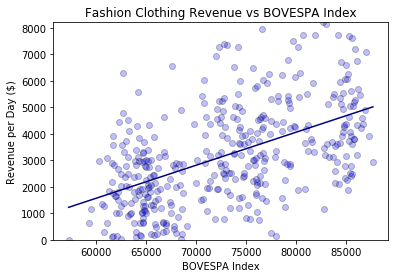

R2 = 0.38
Revenue = 0.181 * (BOVESPA Index) + (-8715.16)


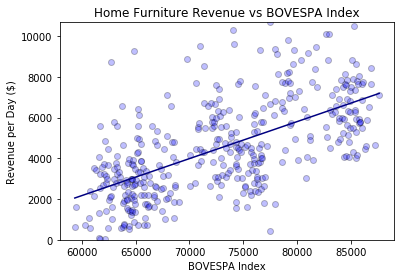

R2 = 0.24
Revenue = 0.053 * (BOVESPA Index) + (-2676.33)


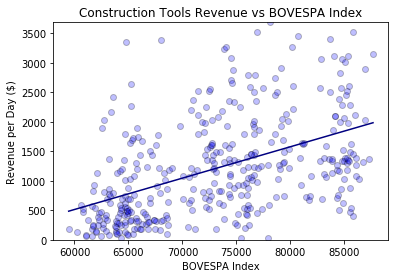

R2 = 0.32
Revenue = 0.141 * (BOVESPA Index) + (-7335.77)


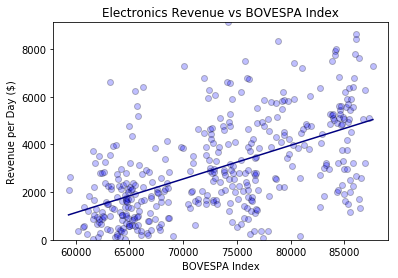

R2 = 0.07
Revenue = 0.004 * (BOVESPA Index) + (-167.18)


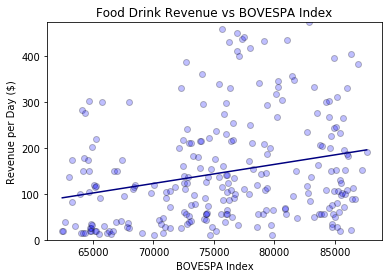

R2 = 0.01
Revenue = 0.001 * (BOVESPA Index) + (43.18)


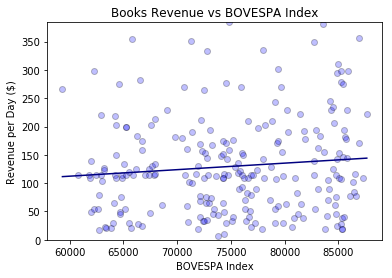

R2 = 0.15
Revenue = 0.031 * (BOVESPA Index) + (-1596.31)


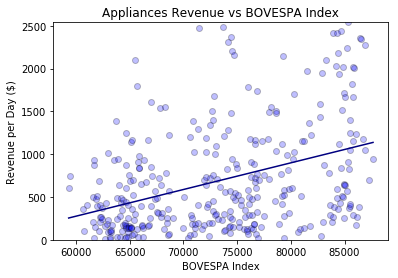

R2 = 0.22
Revenue = 0.043 * (BOVESPA Index) + (-2182.09)


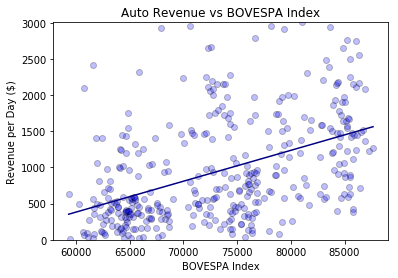

R2 = 0.01
Revenue = 0.006 * (BOVESPA Index) + (-58.64)


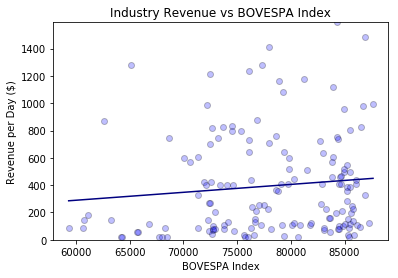

R2 = 0.32
Revenue = 0.175 * (BOVESPA Index) + (-8001.37)


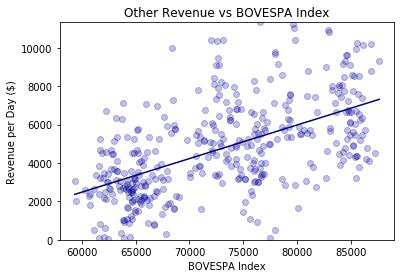

In [11]:
#REVENUE VS BOVESPA BY CATEGORIES
for metric in metriclist:
    for cat in new_categories.keys():
        groupdf = mergedf.groupby([metric, 'category'])
        groupdf = groupdf.sum()
        groupdf.reset_index(inplace = True)

        groupdf = groupdf.loc[groupdf['price'] > 1]
        groupdf = groupdf.loc[groupdf['category'] == cat]
        
        Q1 = np.percentile(groupdf['price'], 25)
        Q3 = np.percentile(groupdf['price'], 75)
        IQR = Q3 - Q1
        UpperBound = Q3 + 1.5 * IQR
        LowerBound = Q1 - 1.5 * IQR
        
        groupdf = groupdf.loc[groupdf['price'] < UpperBound]
        groupdf = groupdf.loc[groupdf['price'] > LowerBound]


        plt.scatter(groupdf[metric], groupdf['price'], color="blue", edgecolor="black", alpha = 0.25,marker="o")
        
        plt.ylim(0, max(groupdf['price']))
        (slopeBOV, interceptBOV, rBOV, _, _) = linregress(groupdf[metric], groupdf['price'])
        fitBOV = slopeBOV * groupdf[metric] + interceptBOV
        
        plt.ylabel('Revenue per Day ($)')
        plt.xlabel('BOVESPA Index')
        plt.title(f'{cat.replace("_", " ").title()} Revenue vs BOVESPA Index')
        plt.plot(groupdf[metric], fitBOV, color = 'navy')
        print(f'R2 = {round(rBOV**2,2)}')
        print(f'Revenue = {round(slopeBOV, 3)} * (BOVESPA Index) + ({round(interceptBOV,2)})')
        
        plt.savefig(f'./Graphs/{metric}{cat}.png')
        plt.show()

R2 = 0.51
Revenue = 1.0139 * (BOVESPA Index) + (-51588.97)


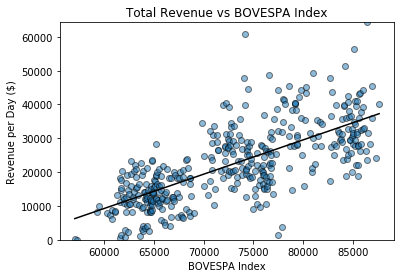

In [13]:
#REVENUE VS BOVESPA FOR TOTAL
for metric in metriclist:
    groupdf = mergedf.groupby(metric)
    groupdf = groupdf.sum()
    groupdf.reset_index(inplace = True)
    #why are there sum of prices at 0? no data from those dates?
    groupdf = groupdf.loc[groupdf['price'] > 1]


    plt.scatter(groupdf[metric], groupdf['price'], alpha = 0.5, edgecolor = 'black')
    plt.ylim(0, max(groupdf['price']))
    (slopeBOV, interceptBOV, rBOV, _, _) = linregress(groupdf[metric], groupdf['price'])

    fitBOV = slopeBOV * groupdf[metric] + interceptBOV
    
    plt.plot(groupdf[metric], fitBOV, color = 'black')
    plt.ylabel('Revenue per Day ($)')
    plt.xlabel('BOVESPA Index')
    plt.title('Total Revenue vs BOVESPA Index')
    
    print(f'R2 = {round(rBOV**2,2)}')
    print(f'Revenue = {round(slopeBOV, 4)} * (BOVESPA Index) + ({round(interceptBOV,2)})')
    plt.savefig(f'./Graphs/TotalRevenueVsBOV.png')
    plt.show()
    

In [16]:
newgroup2 = mergedf.groupby(['month'])['BOV'].mean()
newgroup2 = newgroup2[['01/17','02/17','03/17','04/17','05/17','06/17','07/17','08/17','09/17','10/17','11/17','12/17','01/18','02/18','03/18','04/18','05/18','06/18','07/18','08/18','09/18']]
newgroup2.index.rename('Months Jan 17 to Sept 18 ', inplace=True)
newgroup2

Months Jan 17 to Sept 18 
01/17    64562.376488
02/17    66199.225211
03/17    64969.024764
04/17    64532.438953
05/17    65133.950596
06/17    62101.064476
07/17    64546.228403
08/17    68789.472447
09/17    74371.962906
10/17    76109.226210
11/17    73410.940111
12/17    73408.613551
01/18    80749.288171
02/18    84799.131757
03/18    85196.287035
04/18    85013.524296
05/18    83089.756098
06/18    72668.009422
07/18    77401.025555
08/18    78334.107221
09/18    76561.600000
Name: BOV, dtype: float64

In [17]:
newgroup = mergedf.groupby(['category','month'])['price'].sum()
newgroup

category               month
appliances             01/17      4611.16
                       01/18     31172.44
                       02/17     11038.68
                       02/18     26138.97
                       03/17     23442.07
                       03/18     42187.17
                       04/17     19720.41
                       04/18     62834.02
                       05/17     11393.94
                       05/18     45988.51
                       06/17     15598.45
                       06/18     34732.67
                       07/17     11376.11
                       07/18     34224.70
                       08/17     16614.71
                       08/18     29265.18
                       09/17     16602.68
                       10/16      1707.09
                       10/17     13864.92
                       11/17     18497.81
                       12/17     12205.94
auto                   01/17      5629.53
                       01/18     36809.85
     

In [18]:
newgroup = newgroup.unstack(level=-1)


In [19]:
newgroup = newgroup[['01/17','02/17','03/17','04/17','05/17','06/17','07/17','08/17','09/17','10/17','11/17','12/17','01/18','02/18','03/18','04/18','05/18','06/18','07/18','08/18','09/18']]

#cols = list(newgroup.columns.values)
newgroup



month                        01/17     02/17     03/17     04/17      05/17  \
category                                                                      
appliances                 4611.16  11038.68  23442.07  19720.41   11393.94   
auto                       5629.53  13206.70  14578.76  15116.07   18585.04   
books                       284.79    980.81   2723.96   1366.37    1773.47   
construction_tools         8598.65  14858.90  25133.70  22689.13   22872.78   
costruction_tools_garden       NaN    579.98       NaN   1490.21    1577.24   
costruction_tools_tools        NaN       NaN       NaN   1458.00      74.90   
diapers_and_hygiene            NaN       NaN       NaN       NaN        NaN   
electronics               16677.30  28828.40  54778.85  40668.81   69807.59   
fashion_clothing          16418.44  25652.25  62163.86  53536.70   87123.70   
fixed_telephony             688.11   1076.20   1264.39   3038.32     455.33   
flowers                        NaN       NaN       NaN       NaN        NaN   
food_drink                  192.72    735.63   3072.33    763.13    1087.19   
furniture_living_room      1241.90   3791.63   3427.97   2069.33    4829.47   
health_beauty             13990.49  22043.24  26126.91  23632.92   46798.88   
home_furniture            23475.42  64398.75  75980.16  76779.68  102717.27   
industry                     65.97    462.84    200.99       NaN    2099.74   
other                     32937.22  52590.27  73719.73  78465.74  124108.66   
security_and_services       183.29       NaN       NaN       NaN        NaN   
stationery                 1561.99   2571.30   5915.52   4538.44    5963.88   

month                         06/17      07/17      08/17      09/17  \
category                                                               
appliances                 15598.45   11376.11   16614.71   16602.68   
auto                       32290.69   15456.32   18289.43   15226.07   
books                       2281.98    1820.50    4357.18    2471.49   
construction_tools         17544.86   21543.16   26235.23   28700.46   
costruction_tools_garden     434.69     347.58    1286.19     297.50   
costruction_tools_tools         NaN        NaN        NaN     916.89   
diapers_and_hygiene             NaN        NaN        NaN        NaN   
electronics                51914.61   63848.35  103254.85  105862.76   
fashion_clothing           67215.07   65846.24   68060.07   82599.07   
fixed_telephony              900.68     251.72    3343.54   13659.92   
flowers                         NaN        NaN        NaN        NaN   
food_drink                   257.29    1526.32    1262.21    1838.62   
furniture_living_room       1713.30    4510.09    2543.09    1095.88   
health_beauty              31061.67   38156.90   47276.47   51104.42   
home_furniture             87539.66  134945.94  132944.53  119271.45   
industry                    1666.97    1425.96    1044.90    2213.97   
other                     107300.43  136624.17  142362.46  160458.80   
security_and_services           NaN        NaN        NaN     100.00   
stationery                  3722.37    6869.15    6464.91    6542.31   

month                         10/17  ...        12/17      01/18      02/18  \
category                             ...                                      
appliances                 13864.92  ...     12205.94   31172.44   26138.97   
auto                       20788.28  ...     38073.47   36809.85   42330.67   
books                       1573.30  ...      3338.19    3904.70    3644.76   
construction_tools         33420.83  ...     40422.00   48244.75   50323.36   
costruction_tools_garden     746.90  ...       928.90    3927.98    1538.25   
costruction_tools_tools     1018.60  ...       319.50     712.10    1138.40   
diapers_and_hygiene             NaN  ...        76.00     125.00     100.00   
electronics               126686.91  ...     85318.81  138312.49  146038.25   
fashion_clothing          102502.49  

In [20]:
newgroup.columns.rename('Months Jan 17 to Sept 18 ', inplace=True)

In [21]:
newgroup.head()




Months Jan 17 to Sept 18     01/17     02/17     03/17     04/17     05/17  \
category                                                                     
appliances                 4611.16  11038.68  23442.07  19720.41  11393.94   
auto                       5629.53  13206.70  14578.76  15116.07  18585.04   
books                       284.79    980.81   2723.96   1366.37   1773.47   
construction_tools         8598.65  14858.90  25133.70  22689.13  22872.78   
costruction_tools_garden       NaN    579.98       NaN   1490.21   1577.24   

Months Jan 17 to Sept 18      06/17     07/17     08/17     09/17     10/17  \
category                                                                      
appliances                 15598.45  11376.11  16614.71  16602.68  13864.92   
auto                       32290.69  15456.32  18289.43  15226.07  20788.28   
books                       2281.98   1820.50   4357.18   2471.49   1573.30   
construction_tools         17544.86  21543.16  26235.23  28700.46  33420.83   
costruction_tools_garden     434.69    347.58   1286.19    297.50    746.90   

Months Jan 17 to Sept 18   ...       12/17     01/18     02/18     03/18  \
category                   ...                                             
appliances                 ...    12205.94  31172.44  26138.97  42187.17   
auto                       ...    38073.47  36809.85  42330.67  45297.57   
books                      ...     3338.19   3904.70   3644.76   3033.40   
construction_tools         ...    40422.00  48244.75  50323.36  49846.12   
costruction_tools_garden   ...      928.90   3927.98   1538.25   2497.23   

Months Jan 17 to Sept 18      04/18     05/18     06/18     07/18     08/18  \
category                                                                      
appliances                 62834.02  45988.51  34732.67  34224.70  29265.18   
auto                       48852.83  39811.36  45337.18  43812.92  45132.97   
books                       8259.08   8871.05   5532.99   6694.84   3689.77   
construction_tools         65509.44  81974.52  57330.70  57565.52  56595.88   
costruction_tools_garden    1326.79   1121.27    751.45   2836.37   2808.86   

Months Jan 17 to Sept 18   09/18  
category                          
appliances                   NaN  
auto                         NaN  
books                        NaN  
construction_tools           NaN  
costruction_tools_garden     NaN  

[5 rows x 21 columns]

In [22]:
newgroup = newgroup.drop(['09/18'], axis=1)

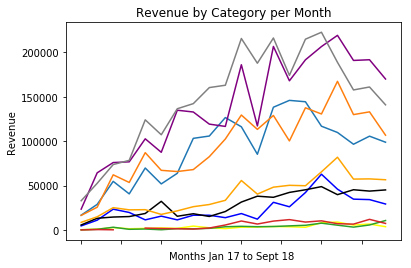

In [23]:
appliances_line = newgroup.iloc[0]
appliances_line.plot(kind='line', color='blue')

auto_line = newgroup.iloc[1]
auto_line.plot(kind='line', color ='black')

books_line = newgroup.iloc[2]
books_line.plot(kind='line', color='yellow')

construction_tools_line = newgroup.iloc[3]
construction_tools_line.plot(kind='line', color='orange')

electronics_line = newgroup.iloc[7]
electronics_line.plot(kind='line')

fashion_clothing_line = newgroup.iloc[8]
fashion_clothing_line.plot(kind='line')

food_drink_line = newgroup.iloc[11]
food_drink_line.plot(kind='line')

home_furniture_line = newgroup.iloc[14]
home_furniture_line.plot(kind='line', color ='purple')

industry_line = newgroup.iloc[15]
industry_line.plot(kind='line')

other_line = newgroup.iloc[16]
other_line.plot(kind='line', color ='gray')





plt.title('Revenue by Category per Month')
plt.ylabel('Revenue')
plt.savefig('./Graphs/CategoricalLineGraph.png')

plt.show()

In [ ]:
Bov_line = newgroup2
Bov_line.plot(kind='line', color='black')

plt.title('BOVESPA Marketcap')
plt.ylabel('Marketcap')
plt.savefig('./Graphs/BOVESPA_marketcap.png')

plt.show()